<a href="https://colab.research.google.com/github/shubhamkoul007/Acquire-Valued-Shopper-Challenge-Team1-TDL/blob/main/CLV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [ ]:
"""
from google.colab import drive

drive.mount('/content/drive')

"""


"\nfrom google.colab import drive\n\ndrive.mount('/content/drive')\n\n"

In [ ]:
# df=pd.read_excel('/content/drive/My Drive/Online Retail.xlsx')

In [2]:

df = pd.read_excel("Online Retail.xlsx" )

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df6=df.copy()

In [5]:
import datetime as dt
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['day'] = df['InvoiceDate'].dt.day
df['month'] = df['InvoiceDate'].dt.month
df['hour']=df['InvoiceDate'].dt.hour
df['weekday'] = df['InvoiceDate'].dt.dayofweek
#df['Date'] = df['InvoiceDate'].dt.Date


In [6]:
df8 = df.copy()
df9 = df.copy()

In [7]:
#Removing all customer id's with Null Value
df=df[pd.notnull(df['CustomerID'])]

#Removing all the returned items(Quantity less than equal to 0)
df=df[df['Quantity']>0]
df['Sales'] = df['Quantity'] * df['UnitPrice']
df[df['CustomerID']==12347]['Sales'].sum()#this monetary value does not match with the monetary value that we get after summary_from_transaction_data


4310.000000000001

In [8]:
#Removing all customer id's with Null Value
df6=df6[pd.notnull(df6['CustomerID'])]

#Removing all the returned items(Quantity less than equal to 0)
df6=df6[df6['Quantity']>0]
df6['Sales'] = df6['Quantity'] * df6['UnitPrice']


In [9]:
df11 = df.copy()
df12 = df.copy()

In [10]:
print(df['CustomerID'].nunique())


4339


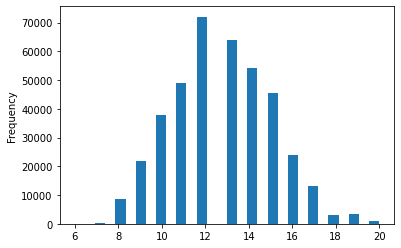

In [ ]:
df['hour'].plot(kind='hist', bins=30)

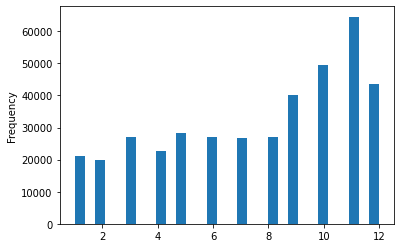

In [ ]:
df['month'].plot(kind='hist', bins=30)

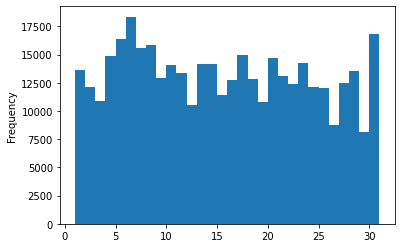

In [ ]:
df['day'].plot(kind='hist', bins=30)

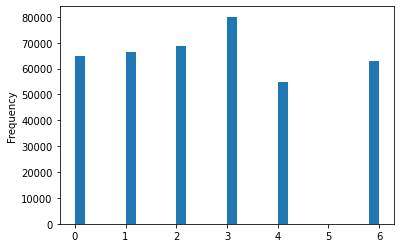

In [ ]:
df['weekday'].plot(kind='hist', bins=30)

In [ ]:
### number of gap days between purchases for all customers
df.head()
#cleaning the data
df1=df.loc[(df['CustomerID'].notnull()==True)]
df1=df1[df1['Quantity']>0]
df1['InvoiceDate']=pd.to_datetime(df1["InvoiceDate"]).dt.date
df1=df1[['CustomerID','InvoiceDate']]
uniqueids=sorted(df1['CustomerID'].unique())

#creating a list containing all transaction dates for the corresponding customer
date_list=[]

for id in uniqueids:

  date=df1[df1['CustomerID']==id]['InvoiceDate'].unique()
  date=sorted(date)
  date_list.append(date)
  
#creating a df with customer ids and the created col containing all purchase dates
date_df=pd.DataFrame(list(zip(uniqueids,date_list)),columns=['CustomerID','Purchase_dates'])
date_df.head()

,CustomerID,Purchase_dates
0,12346.0,[2011-01-18]
1,12347.0,"[2010-12-07, 2011-01-26, 2011-04-07, 2011-06-0..."
2,12348.0,"[2010-12-16, 2011-01-25, 2011-04-05, 2011-09-25]"
3,12349.0,[2011-11-21]
4,12350.0,[2011-02-02]


In [ ]:
##creating a list containing number of gap days between purchases for each customer

gap_list=[]
n=len(date_df)
for i in range(n):
  purchase_dates=date_df['Purchase_dates'][i]
  m=len(date_df['Purchase_dates'][i])
  if m==1:
    gap_list.append(0)
  else:
    #gap=0
    for j in range(m-1):
      gap=gap_list.append(((purchase_dates[j+1]-purchase_dates[j]).days))

## creating a dataframe of all gap days
df_gap=pd.DataFrame(gap_list,columns=['gap_days'])
df_gap.head()



,gap_days
0,0
1,50
2,71
3,63
4,54


In [ ]:
#viewing the frequency of each gap day
import numpy as np
lst=np.array(gap_list)
(unique, counts) = np.unique(lst, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies


array([[   0, 1549],
       [   1,  328],
       [   2,  296],
       [   3,  265],
       [   4,  265],
       [   5,  278],
       [   6,  306],
       [   7,  411],
       [   8,  287],
       [   9,  231],
       [  10,  209],
       [  11,  185],
       [  12,  227],
       [  13,  244],
       [  14,  358],
       [  15,  224],
       [  16,  183],
       [  17,  167],
       [  18,  148],
       [  19,  176],
       [  20,  201],
       [  21,  296],
       [  22,  179],
       [  23,  136],
       [  24,  125],
       [  25,  135],
       [  26,  127],
       [  27,  139],
       [  28,  223],
       [  29,  147],
       [  30,  132],
       [  31,  127],
       [  32,  107],
       [  33,  111],
       [  34,  131],
       [  35,  174],
       [  36,  128],
       [  37,  107],
       [  38,   97],
       [  39,  115],
       [  40,  103],
       [  41,  112],
       [  42,  160],
       [  43,  114],
       [  44,   87],
       [  45,   90],
       [  46,   84],
       [  47,

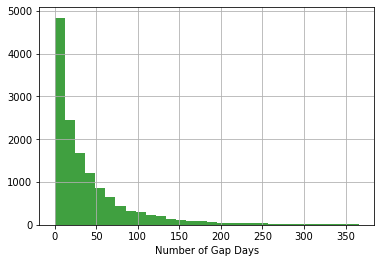

In [ ]:
plt.hist(np.array(gap_list), 30, facecolor='g', alpha=0.75)
plt.grid()
plt.xlabel("Number of Gap Days")
plt.show()

In [11]:
!pip install lifetimes

     |████████████████████████████████| 593kB 2.6MB/s 


In [13]:

from lifetimes.plotting import *
from lifetimes.utils import *
data = summary_data_from_transaction_data(df, 'CustomerID', 'InvoiceDate', monetary_value_col='Sales', observation_period_end='2011-12-10')
data1 = data.copy()
data2 = data.copy()
data.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,326.0,0.000000
12347.0,6.0,365.0,368.0,599.701667
12348.0,3.0,283.0,359.0,301.480000
12349.0,0.0,0.0,19.0,0.000000
12350.0,0.0,0.0,311.0,0.000000


In [ ]:
data.reset_index()
data=data.reindex(columns=['CustomerID','frequency','recency','T','monetary_value']) 


In [11]:

data['CustomerID']=data.index
data.head()

,frequency,recency,T,monetary_value,CustomerID
CustomerID,,,,,
12346.0,0.0,0.0,326.0,0.000000,12346.0
12347.0,6.0,365.0,368.0,599.701667,12347.0
12348.0,3.0,283.0,359.0,301.480000,12348.0
12349.0,0.0,0.0,19.0,0.000000,12349.0
12350.0,0.0,0.0,311.0,0.000000,12350.0


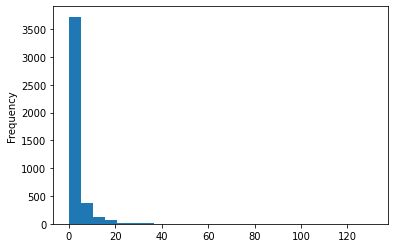

In [12]:
data['frequency'].plot(kind='hist', bins=25)

In [13]:
out=data[['CustomerID','frequency']]
(out.sort_values(by=['frequency'], ascending=False)).head(20)

,CustomerID,frequency
CustomerID,,
14911.0,14911.0,131.0
12748.0,12748.0,113.0
17841.0,17841.0,111.0
15311.0,15311.0,89.0
14606.0,14606.0,88.0
12971.0,12971.0,70.0
13089.0,13089.0,65.0
14527.0,14527.0,53.0
13798.0,13798.0,52.0


In [34]:
out[out['frequency'] < 50 ]

,CustomerID,frequency
CustomerID,,
12346.0,12346.0,0.0
12347.0,12347.0,6.0
12348.0,12348.0,3.0
12349.0,12349.0,0.0
12350.0,12350.0,0.0
...,...,...
18280.0,18280.0,0.0
18281.0,18281.0,0.0
18282.0,18282.0,1.0


In [14]:
### percentage of customers with x repeat purchases
xd=pd.DataFrame(data['frequency'],columns=['frequency'])
xd=xd.groupby(['frequency']).size().reset_index(name='count%')
xd['count%']=(xd['count%']/(xd['count%'].sum())*100)
xd.head(10)

,frequency,count%
0,0.0,35.699470
1,1.0,20.142890
2,2.0,11.546439
3,3.0,8.942153
4,4.0,5.254667
5,5.0,4.240608
6,6.0,3.042176
7,7.0,1.982024
8,8.0,1.544135
9,9.0,1.106246


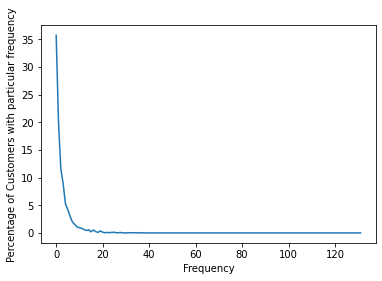

In [15]:
plt.plot( xd['frequency'] , xd['count%'] ) 
plt.xlabel('Frequency')
plt.ylabel('Percentage of Customers with particular frequency')
plt.show()


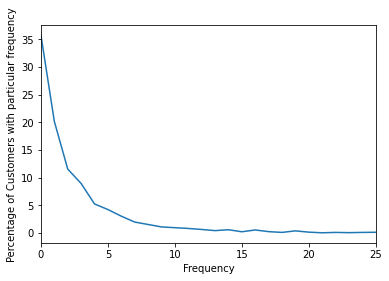

In [16]:
plt.plot( xd['frequency'] , xd['count%'] ) 
plt.xlabel('Frequency')
plt.ylabel('Percentage of Customers with particular frequency')
plt.xlim(0,25)
plt.show()

In [ ]:

# average number of gap between purchases of  customers with repeat purchases
md=data[data['frequency']>0]
md=md[['frequency','recency']]
md['AvgPurDays']= (md['recency']/md['frequency']).round()
md.head(10)


,frequency,recency,AvgPurDays
CustomerID,,,
12347.0,6.0,365.0,61.0
12348.0,3.0,283.0,94.0
12352.0,6.0,260.0,43.0
12356.0,2.0,303.0,152.0
12358.0,1.0,149.0,149.0
12359.0,3.0,274.0,91.0
12360.0,2.0,148.0,74.0
12362.0,9.0,292.0,32.0
12363.0,1.0,133.0,133.0


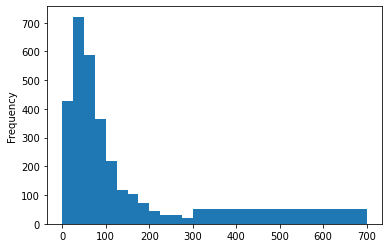

In [ ]:
#histogram showing average purchase dates
bins=[0,25,50,75,100,125,150,175,200,225,250,275,300,700]
md['AvgPurDays'].plot(kind='hist', bins=bins)

In [ ]:
md['AvgPurDays'].value_counts(bins=bins, sort=False).head(15)

(-0.001, 25.0]    454
(25.0, 50.0]      724
(50.0, 75.0]      575
(75.0, 100.0]     359
(100.0, 125.0]    209
(125.0, 150.0]    116
(150.0, 175.0]    107
(175.0, 200.0]     68
(200.0, 225.0]     46
(225.0, 250.0]     32
(250.0, 275.0]     27
(275.0, 300.0]     20
(300.0, 700.0]     53
Name: AvgPurDays, dtype: int64

In [ ]:
data.describe()

,CustomerID,frequency,recency,T,monetary_value
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2.864024,130.741415,223.782899,306.944168
std,1721.889758,5.952745,132.210176,117.883623,2612.453380
min,12346.000000,0.000000,0.000000,1.000000,0.000000
25%,13812.500000,0.000000,0.000000,113.000000,0.000000
50%,15299.000000,1.000000,93.000000,249.000000,176.940000
75%,16778.500000,3.000000,252.000000,327.000000,360.161667
max,18287.000000,131.000000,373.000000,374.000000,168469.600000


In [ ]:
stdt=df['InvoiceDate'].min()
stdt

Timestamp('2010-12-01 08:26:00')

In [ ]:
endt=df['InvoiceDate'].max()
endt

Timestamp('2011-12-09 12:50:00')

**BG/NBD implementation Time v/s Pareto/NBD implementation time**

**frequency-num of repeats=num of transactions-1**


**recency-age of customer from first transaction**


**T-age of customer till the observation period**

In [14]:
import time
start=time.time()
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data1['frequency'], data1['recency'], data1['T'])
#print(bgf)

end =time.time()
print("TIme elapsed :",end-start,"seconds")

TIme elapsed : 0.31307125091552734 seconds


In [15]:
import time
start=time.time()
from lifetimes import ParetoNBDFitter
pareto = ParetoNBDFitter(penalizer_coef=0.0)
pareto.fit(data1['frequency'], data1['recency'], data1['T'])
#print(bgf)

end =time.time()
print("TIme elapsed :",end-start,"seconds")



TIme elapsed : 1.386446237564087 seconds


In [16]:

import time
start=time.time()
from lifetimes import ModifiedBetaGeoFitter
pareto = ModifiedBetaGeoFitter(penalizer_coef=0.0)
pareto.fit(data1['frequency'], data1['recency'], data1['T'])
#print(bgf)

end =time.time()
print("TIme elapsed :",end-start,"seconds")


TIme elapsed : 0.2963728904724121 seconds


What are the expected number of transactions a customer is to make in the next time period, given his recency (age at last purchase) and frequency (the number of repeat transactions he has made)??

Frequency/Recency Matrix

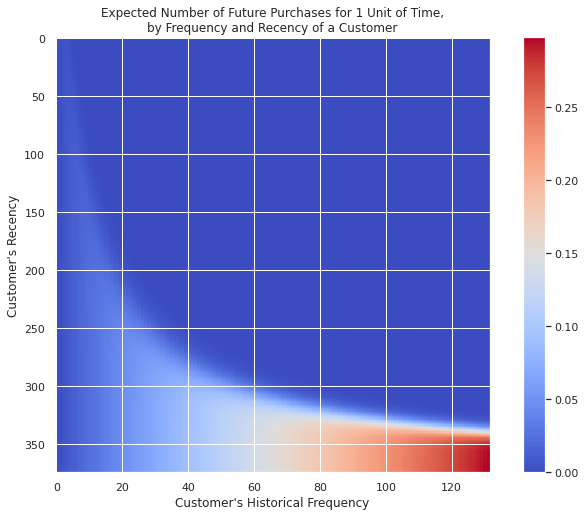

In [ ]:
import seaborn as sns
sns.set_palette("husl")
sns.set(rc={'image.cmap':'coolwarm'})
%matplotlib inline
from lifetimes.plotting import plot_frequency_recency_matrix

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)


What is the probability of a customer being alive??


In [17]:
recency=(data1['recency'].to_numpy())
freq=data1['frequency'].to_numpy()


rf =zip(recency,freq)
lst=[]

for r,f in rf:
    lst.append(bgf.conditional_probability_alive_matrix(int(data1['frequency'].max()),int(data1['recency'].max()))[int(r),int(f)])
print(lst)



[1.0, 0.9996184957131284, 0.9989176866055391, 1.0, 1.0, 0.9974813461718293, 1.0, 1.0, 1.0, 0.9991659939906717, 1.0, 0.9978625368964519, 0.9988051618292724, 0.9961913014705267, 1.0, 0.9980475163918869, 0.9975445407385217, 0.9842430796867275, 1.0, 1.0, 0.9991755996522065, 0.9879659055367018, 0.9983804425697295, 1.0, 1.0, 0.9961178113790903, 0.9923520880414699, 1.0, 0.9961623166874648, 0.9947818577573596, 0.9729259437052997, 0.9918529955672845, 0.9963326818537234, 0.9908846807471492, 0.9991122480185559, 1.0, 1.0, 0.9985990895128638, 0.9979489547179586, 0.9995753962192349, 0.996603963433037, 1.0, 0.9923951418617528, 1.0, 1.0, 1.0, 1.0, 0.9980611542527947, 0.9965783458725528, 0.9979298278412548, 0.9928045448336064, 1.0, 0.9916434925963287, 0.9989250843870254, 0.9913516387912423, 0.9980927676625128, 0.9995764340116339, 1.0, 1.0, 0.9991325794473883, 0.998440979293137, 0.9995544435105924, 1.0, 1.0, 1.0, 0.9994038525172229, 0.9973746626221113, 0.9994731784609387, 1.0, 0.9993421932924693, 0.9951

In [106]:
lst

[1.0,
 0.9996184957131284,
 0.9989176866055391,
 1.0,
 1.0,
 0.9974813461718293,
 1.0,
 1.0,
 1.0,
 0.9991659939906717,
 1.0,
 0.9978625368964519,
 0.9988051618292724,
 0.9961913014705267,
 1.0,
 0.9980475163918869,
 0.9975445407385217,
 0.9842430796867275,
 1.0,
 1.0,
 0.9991755996522065,
 0.9879659055367018,
 0.9983804425697295,
 1.0,
 1.0,
 0.9961178113790903,
 0.9923520880414699,
 1.0,
 0.9961623166874648,
 0.9947818577573596,
 0.9729259437052997,
 0.9918529955672845,
 0.9963326818537234,
 0.9908846807471492,
 0.9991122480185559,
 1.0,
 1.0,
 0.9985990895128638,
 0.9979489547179586,
 0.9995753962192349,
 0.996603963433037,
 1.0,
 0.9923951418617528,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9980611542527947,
 0.9965783458725528,
 0.9979298278412548,
 0.9928045448336064,
 1.0,
 0.9916434925963287,
 0.9989250843870254,
 0.9913516387912423,
 0.9980927676625128,
 0.9995764340116339,
 1.0,
 1.0,
 0.9991325794473883,
 0.998440979293137,
 0.9995544435105924,
 1.0,
 1.0,
 1.0,
 0.9994038525172229,
 0.997

In [107]:
len(lst)

4339

In [32]:
data1['CustomerID']=data1.index
df_prob_alive = pd.DataFrame(list(zip(data1['CustomerID'].to_numpy(), lst)),
               columns =['ID', 'alive_prob']) 
df_prob_alive.head(14000)

,ID,alive_prob
0,12346.0,1.000000
1,12347.0,0.999618
2,12348.0,0.998918
3,12349.0,1.000000
4,12350.0,1.000000
...,...,...
4334,18280.0,1.000000
4335,18281.0,1.000000
4336,18282.0,0.997202
4337,18283.0,0.999246


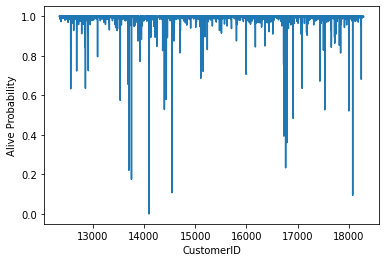

In [19]:
plt.plot( df_prob_alive['ID'] , df_prob_alive['alive_prob'] ) 
plt.xlabel('CustomerID')
plt.ylabel('Alive Probability')
plt.show()


What is the  probability a customer is alive based on their frequency and recency.??

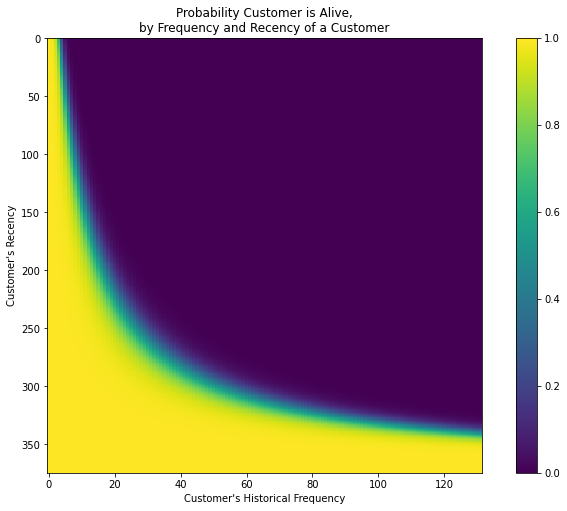

In [22]:
from lifetimes.plotting import plot_probability_alive_matrix
fig =plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [29]:
def plot_history_alive1(model, t, transactions, datetime_col, freq="D", start_date=None, ax=None, **kwargs):
    """
    Draw a graph showing the probability of being alive for a customer in time.
    Parameters
    ----------
    model: lifetimes model
        A fitted lifetimes model.
    t: int
        the number of time units since the birth we want to draw the p_alive
    transactions: pandas DataFrame
        DataFrame containing the transactions history of the customer_id
    datetime_col: str
        The column in the transactions that denotes the datetime the purchase was made
    freq: str, optional
        Default 'D' for days. Other examples= 'W' for weekly
    start_date: datetime, optional
        Limit xaxis to start date
    ax: matplotlib.AxesSubplot, optional
        Using user axes
    kwargs
        Passed into the matplotlib.pyplot.plot command.
    Returns
    -------
    axes: matplotlib.AxesSubplot
    """
    from matplotlib import pyplot as plt

    if start_date is None:
        start_date = min(transactions[datetime_col])

    if ax is None:
        ax = plt.subplot(111)

    # Get purchasing history of user
    customer_history = transactions[[datetime_col]].copy()
    customer_history.index = pd.DatetimeIndex(customer_history[datetime_col])

    # Add transactions column
    customer_history["transactions"] = 1
    customer_history = customer_history.resample(freq).sum()

    # plot alive_path
    path = calculate_alive_path(model, transactions, datetime_col, t, freq)
    path_dates = pd.date_range(start=min(transactions[datetime_col]), periods=len(path), freq=freq)
    plt.plot(path_dates, path, "-", label="P_alive")

    # plot buying dates
    payment_dates = customer_history[customer_history["transactions"] >= 1].index
    plt.vlines(payment_dates.values, ymin=0, ymax=1, colors="r", linestyles="dashed", label="purchases")

    plt.ylim(0, 1.5)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlim(start_date, path_dates[-1])
    plt.legend(loc=3)
    plt.ylabel("P_alive")
    plt.title("History of P_alive")

    return ax

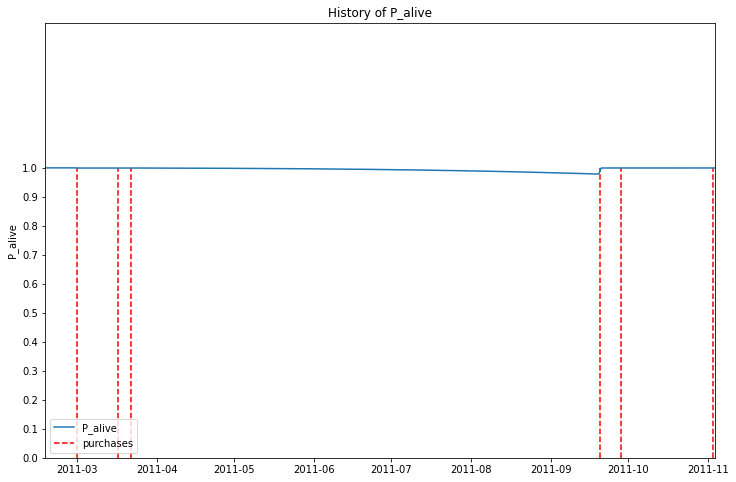

In [31]:

from lifetimes.plotting import plot_history_alive


fig = plt.figure(figsize=(12,8))

id = 12352
days_since_birth = 200
sp_trans = df.loc[df['CustomerID'] == id]
plot_history_alive1(bgf, days_since_birth, sp_trans, 'InvoiceDate')


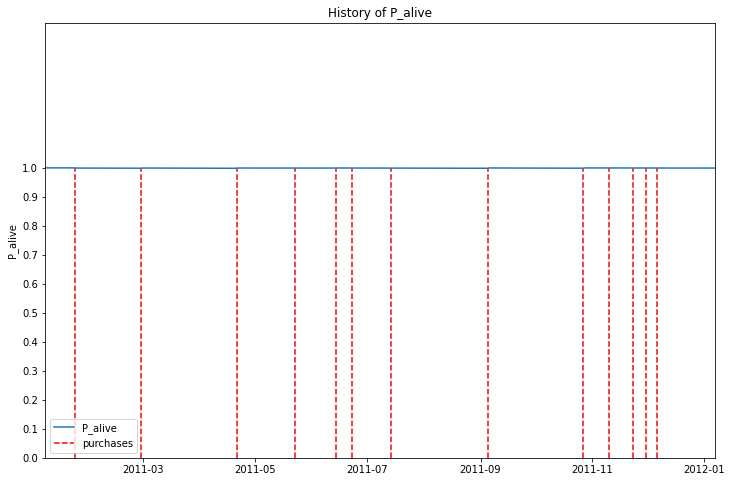

In [30]:
fig = plt.figure(figsize=(12,8))
id = 18283
days_since_birth = 365
sp_trans = df.loc[df['CustomerID'] == id]
plot_history_alive1(bgf, days_since_birth, sp_trans,'InvoiceDate')

What is the expected number of purchases of a customer in the next t days???


In [ ]:
t=10
data['predicted_purchases']=bgf.conditional_expected_number_of_purchases_up_to_time(t,
                                                       data['frequency'],
                                                       data['recency'],
                                                       data['T'])
data.head()
data.sort_values(by='predicted_purchases').tail(5)
#Listed below are our top 5 customers that the model expects them to make purchases in the next day.

,CustomerID,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,,
14606.0,14606.0,88.0,372.0,374.0,135.890114,2.003901
15311.0,15311.0,89.0,373.0,374.0,677.729438,2.026485
17841.0,17841.0,111.0,372.0,374.0,364.452162,2.522796
12748.0,12748.0,113.0,373.0,374.0,298.360885,2.567949
14911.0,14911.0,131.0,372.0,374.0,1093.661679,2.974008


In [ ]:
#(thought)from here also we can get our most valuabe customers-the customers that the model predicts 
#will be making more purchases in the near future.

How good is our model??

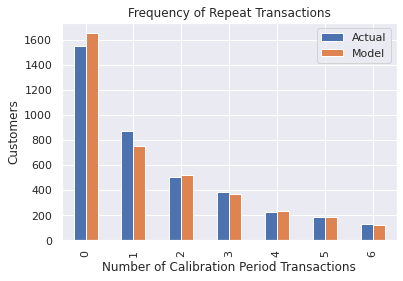

In [ ]:
#Calibration Period = Training Set 
#Holdout Period = Testing Set

from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

#Here Calibration Period and Holdout Period
#are both whole observation period
#So model has overfitting

**TRAIN TEST SPLIT**

In [39]:
data2 = calibration_and_holdout_data(df, 'CustomerID', 'InvoiceDate', calibration_period_end='2011-09-10',monetary_value_col='Sales')
data2.head(20)

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
CustomerID,,,,,,,
12346.0,0.0,0.0,235.0,0.0000,0.0,0.000000,90.0
12347.0,4.0,238.0,277.0,519.7675,2.0,26.192069,90.0
12348.0,2.0,110.0,268.0,297.2200,1.0,103.333333,90.0
12350.0,0.0,0.0,220.0,0.0000,0.0,0.000000,90.0
12352.0,3.0,34.0,206.0,421.7700,3.0,20.090000,90.0
12353.0,0.0,0.0,114.0,0.0000,0.0,0.000000,90.0
12354.0,0.0,0.0,142.0,0.0000,0.0,0.000000,90.0
12355.0,0.0,0.0,124.0,0.0000,0.0,0.000000,90.0
12356.0,1.0,80.0,235.0,481.4600,1.0,29.175000,90.0


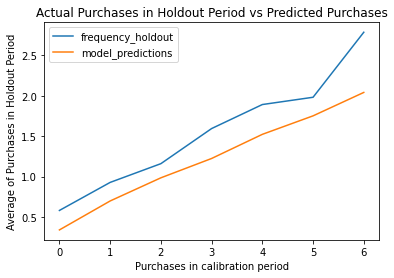

In [48]:
bgf1 = BetaGeoFitter(penalizer_coef = 0.05)
bgf1.fit(data2['frequency_cal'], data2['recency_cal'], data2['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf1, data2)
#ax.set_xlabel('Purchases/ Number of Transactions')


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(frequency_holdout, model_predictions)

NameError: ignored

**CLV CALCULATIONS**

In [69]:
returning_customers_summary = data[data['frequency']>0]
print(returning_customers_summary.head())
print(len(returning_customers_summary))

            frequency  recency      T  monetary_value
CustomerID                                           
12347.0           6.0    365.0  368.0      599.701667
12348.0           3.0    283.0  359.0      301.480000
12352.0           6.0    260.0  297.0      368.256667
12356.0           2.0    303.0  326.0      269.905000
12358.0           1.0    149.0  151.0      683.200000
2790


In [70]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


In [71]:
#After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 

print(ggf.conditional_expected_average_profit(
        returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value']
    ).head(10))

CustomerID
12347.0     569.988807
12348.0     333.762672
12352.0     376.166864
12356.0     324.008941
12358.0     539.930643
12359.0    1515.282839
12360.0     652.217077
12362.0     514.793066
12363.0     341.147333
12364.0     282.075487
dtype: float64


In [72]:
#Calculate Customer Lifetime Value
returning_customers_summary['CLV'] = round(ggf.customer_lifetime_value(
    bgf, returning_customers_summary['frequency'],returning_customers_summary['recency'],
    returning_customers_summary['T'], returning_customers_summary['monetary_value'],
    time=12, discount_rate=0.01 ), 2)

returning_customers_summary.head()



,frequency,recency,T,monetary_value,CLV
CustomerID,,,,,
12347.0,6.0,365.0,368.0,599.701667,3000.94
12348.0,3.0,283.0,359.0,301.480000,1005.11
12352.0,6.0,260.0,297.0,368.256667,2363.31
12356.0,2.0,303.0,326.0,269.905000,781.15
12358.0,1.0,149.0,151.0,683.200000,1508.94


In [ ]:
#returning_customers_summary.drop( returning_customers_summary.iloc[:, 0:6], inplace=True, axis=1 )

#returning_customers_summary.sort_values(by='CLV', ascending=False).head(10).reset_index()

In [73]:
returning_customers_summary = returning_customers_summary.reindex(columns= ['CustomerID','frequency','recency','T','monetary_value','CLV'])

returning_customers_summary['CustomerID'] = returning_customers_summary.index

returning_customers_summary.head(10)


,CustomerID,frequency,recency,T,monetary_value,CLV
CustomerID,,,,,,
12347.0,12347.0,6.0,365.0,368.0,599.701667,3000.94
12348.0,12348.0,3.0,283.0,359.0,301.480000,1005.11
12352.0,12352.0,6.0,260.0,297.0,368.256667,2363.31
12356.0,12356.0,2.0,303.0,326.0,269.905000,781.15
12358.0,12358.0,1.0,149.0,151.0,683.200000,1508.94
12359.0,12359.0,3.0,274.0,332.0,1941.693333,4870.73
12360.0,12360.0,2.0,148.0,201.0,789.240000,2298.41
12362.0,12362.0,9.0,292.0,296.0,527.458889,4669.90
12363.0,12363.0,1.0,133.0,243.0,252.900000,672.16


In [74]:
returning_customers_summary.reset_index(drop=True, inplace=True)
returning_customers_summary.head()

,CustomerID,frequency,recency,T,monetary_value,CLV
0,12347.0,6.0,365.0,368.0,599.701667,3000.94
1,12348.0,3.0,283.0,359.0,301.480000,1005.11
2,12352.0,6.0,260.0,297.0,368.256667,2363.31
3,12356.0,2.0,303.0,326.0,269.905000,781.15
4,12358.0,1.0,149.0,151.0,683.200000,1508.94


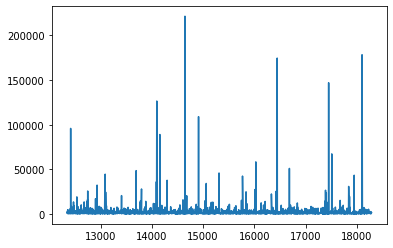

In [75]:
plt.plot( returning_customers_summary['CustomerID'] , returning_customers_summary['CLV'] ) 

plt.show()


In [76]:
sorted_returning_customers_summary = returning_customers_summary.sort_values(by='CLV', ascending=False )

sorted_returning_customers_summary.head()

,CustomerID,frequency,recency,T,monetary_value,CLV
1111,14646.0,44.0,353.0,355.0,6366.705909,221392.88
2706,18102.0,25.0,367.0,368.0,9349.477200,178317.87
1938,16446.0,1.0,205.0,206.0,168469.600000,174568.39
2413,17450.0,26.0,359.0,368.0,7404.690385,146998.54
834,14096.0,16.0,97.0,102.0,4071.434375,126552.90


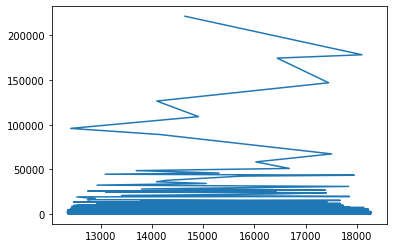

In [88]:
plt.plot( sorted_returning_customers_summary['CustomerID'] , sorted_returning_customers_summary['CLV'] ) 

plt.show()


In [79]:
Unique_Customers = len( sorted_returning_customers_summary )
Unique_Customers

2790

In [90]:
sorted_returning_customers_summary['rank'] = [ i for i in range(1,Unique_Customers+1)  ]

sorted_returning_customers_summary


,CustomerID,frequency,recency,T,monetary_value,CLV,rank
1111,14646.0,44.0,353.0,355.0,6366.705909,221392.88,1
2706,18102.0,25.0,367.0,368.0,9349.477200,178317.87,2
1938,16446.0,1.0,205.0,206.0,168469.600000,174568.39,3
2413,17450.0,26.0,359.0,368.0,7404.690385,146998.54,4
834,14096.0,16.0,97.0,102.0,4071.434375,126552.90,5
...,...,...,...,...,...,...,...
809,14037.0,1.0,188.0,365.0,35.400000,340.94,2786
1502,15512.0,1.0,204.0,360.0,19.800000,334.65,2787
212,12755.0,1.0,85.0,366.0,17.550000,327.72,2788
2288,17194.0,1.0,87.0,361.0,10.000000,326.61,2789


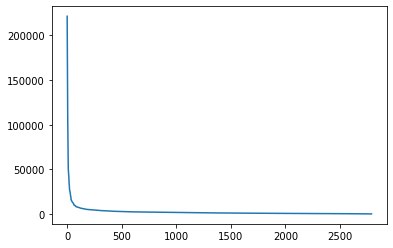

In [91]:
plt.plot( sorted_returning_customers_summary['rank'] , sorted_returning_customers_summary['CLV'] ) 

plt.show()

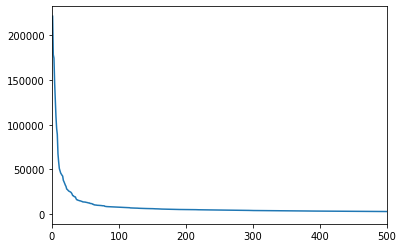

In [93]:
plt.plot( sorted_returning_customers_summary['rank'] , sorted_returning_customers_summary['CLV'] ) 

plt.xlim(0,500)
plt.show()


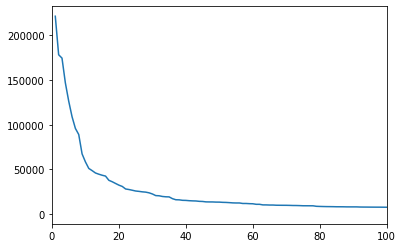

In [94]:
plt.plot( sorted_returning_customers_summary['rank'] , sorted_returning_customers_summary['CLV'] ) 

plt.xlim(0,100)

plt.show()

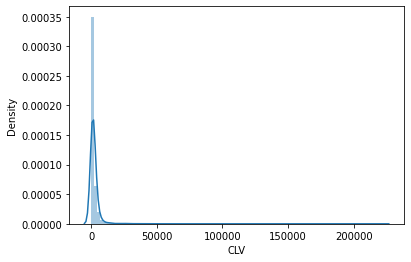

In [92]:
sns.distplot(sorted_returning_customers_summary['CLV'],bins=100)

In [96]:
top_25percent_customers = sorted_returning_customers_summary[ 0 : int(Unique_Customers/4) ]

top_25percent_customers

,CustomerID,frequency,recency,T,monetary_value,CLV,rank
1111,14646.0,44.0,353.0,355.0,6366.705909,221392.88,1
2706,18102.0,25.0,367.0,368.0,9349.477200,178317.87,2
1938,16446.0,1.0,205.0,206.0,168469.600000,174568.39,3
2413,17450.0,26.0,359.0,368.0,7404.690385,146998.54,4
834,14096.0,16.0,97.0,102.0,4071.434375,126552.90,5
...,...,...,...,...,...,...,...
2498,17633.0,3.0,89.0,121.0,330.650000,2403.58,693
2437,17504.0,5.0,116.0,323.0,511.176000,2402.08,694
673,13758.0,6.0,362.0,374.0,471.350000,2401.96,695
1571,15654.0,1.0,17.0,27.0,327.510000,2400.14,696


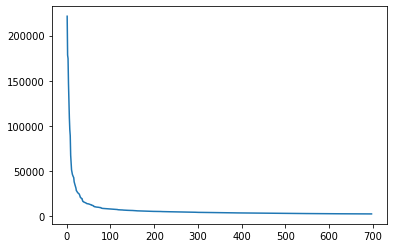

In [97]:
plt.plot( top_25percent_customers['rank'] , top_25percent_customers['CLV'] ) 

plt.show()

In [85]:
top_25percent_customers.describe()

,CustomerID,frequency,recency,T,monetary_value,CLV
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,15067.212339,9.956958,248.667145,270.853659,1014.139751,7265.534749
std,1763.722767,11.732208,115.076891,111.999455,6457.084161,16694.141752
min,12347.000000,1.000000,1.000000,11.000000,106.703750,2399.630000
25%,13521.000000,4.000000,165.000000,206.000000,357.056000,2907.300000
50%,14911.000000,7.000000,284.000000,316.000000,502.613333,3806.910000
75%,16626.000000,12.000000,352.000000,366.000000,810.697500,5502.570000
max,18272.000000,131.000000,373.000000,374.000000,168469.600000,221392.880000


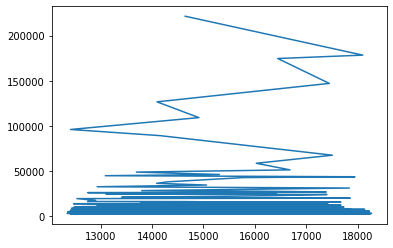

In [86]:
plt.plot( top_25percent_customers['CustomerID'] , top_25percent_customers['CLV'] ) 

plt.show()


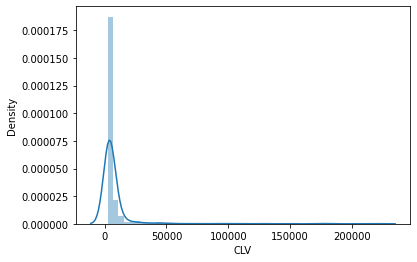

In [87]:
sns.distplot(top_25percent_customers['CLV'])

In [98]:
top_25_to_50_percent_customers = sorted_returning_customers_summary[ int(Unique_Customers/4) : int(Unique_Customers/2 )  ]

top_25_to_50_percent_customers.head(10)


,CustomerID,frequency,recency,T,monetary_value,CLV,rank
1681,15877.0,1.0,16.0,18.0,251.020000,2398.65,698
1698,15932.0,7.0,285.0,290.0,311.162857,2396.49,699
487,13362.0,3.0,278.0,288.0,759.346667,2396.33,700
2014,16628.0,4.0,205.0,235.0,456.850000,2394.53,701
2162,16928.0,16.0,293.0,374.0,170.709375,2386.92,702
1025,14482.0,5.0,221.0,240.0,366.010000,2385.61,703
523,13451.0,4.0,308.0,335.0,643.665000,2385.15,704
1721,15984.0,9.0,366.0,369.0,301.663333,2380.89,705
1417,15296.0,5.0,276.0,327.0,494.706000,2378.96,706
29,12408.0,3.0,228.0,261.0,683.653333,2378.72,707


In [99]:
top_25_to_50_percent_customers.describe()

,CustomerID,frequency,recency,T,monetary_value,CLV,rank
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.00000
mean,15278.436963,3.780802,191.598854,227.305158,388.375654,1826.554140,1046.50000
std,1706.549020,2.676070,115.924193,116.547747,251.497045,292.856681,201.63953
min,12352.000000,1.000000,1.000000,10.000000,13.200000,1393.730000,698.00000
25%,13825.750000,2.000000,73.000000,111.500000,235.081250,1576.187500,872.25000
50%,15239.500000,3.000000,203.000000,252.000000,332.113571,1783.570000,1046.50000
75%,16780.250000,5.000000,293.000000,333.000000,453.855000,2067.912500,1220.75000
max,18287.000000,19.000000,370.000000,374.000000,2188.500000,2398.650000,1395.00000


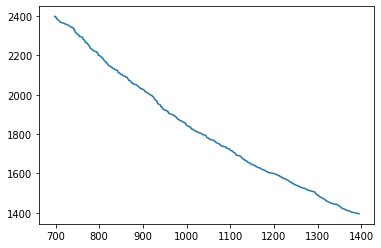

In [101]:
plt.plot( top_25_to_50_percent_customers['rank'] , top_25_to_50_percent_customers['CLV'] ) 

plt.show()


In [102]:
top_50_to_75_percent_customers = sorted_returning_customers_summary[ int(Unique_Customers/2) : int(3* Unique_Customers/4 )  ]


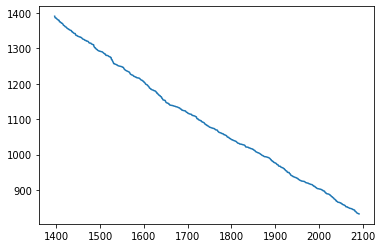

In [104]:
plt.plot( top_50_to_75_percent_customers['rank'] , top_50_to_75_percent_customers['CLV'] ) 

plt.show()

In [103]:
last_25_percent_customers = sorted_returning_customers_summary[ int(3*Unique_Customers/4) : int(Unique_Customers+1 )  ]


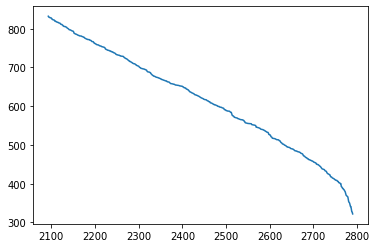

In [105]:
plt.plot( last_25_percent_customers['rank'] , last_25_percent_customers['CLV'] ) 

plt.show()

In [ ]:
bgf.conditional_probability_alive_matrix(int(data1['frequency'].max()),int(data1['recency'].max()))[int(r),int(f)]